In [1]:
import osmnx as ox
import matplotlib.pyplot as plt
from collections import defaultdict
import heapq
import math
from timeit import default_timer as timer
%matplotlib inline

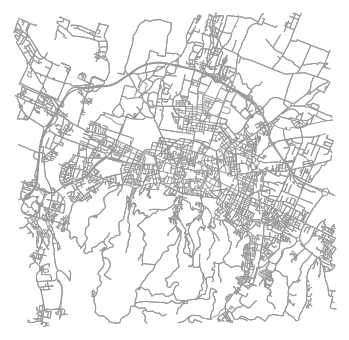

In [2]:
G = ox.load_graphml('network_proj.graphml')
fig, ax = ox.plot_graph(G, node_color = 'w')

In [3]:
proj_nodes, proj_edges = ox.graph_to_gdfs(G)

In [4]:
lista_nodi = proj_nodes['osmid'].tolist()
y = proj_nodes['y'].tolist()
x = proj_nodes['x'].tolist()
tail = proj_edges['u'].tolist()
head = proj_edges['v'].tolist()
weight = proj_edges['length'].tolist()
my_edges = []

for i in range(len(tail)):
    my_edges.append([tail[i],head[i],weight[i]])

coord = {}
j = 0
for i in lista_nodi:
    coord[i] = [x[j], y[j]]
    j = j + 1

      
graph = defaultdict(list)
for t, h, w in my_edges:
    graph[t].append((h, w))

In [5]:
def euclidian_distance(x_1,y_1,x_2,y_2):
    return math.sqrt((x_1-x_2)**2 + (y_1-y_2)**2)

def manhattan_distance(x_1,y_1,x_2,y_2):
    return abs(x_1 - x_2) + abs(y_1 - y_2)

def cebysev_distance(x_1,y_1,x_2,y_2):
    return max(abs(x_1 - x_2), abs(y_1 - y_2))

def euclidian(node, target):
    return euclidian_distance(coord[node][0], coord[node][1], coord[target][0], coord[target][1])
        
def manhattan(node, target):
    return manhattan_distance(coord[node][0], coord[node][1], coord[target][0], coord[target][1])

def cebysev(node, target):
    return cebysev_distance(coord[node][0], coord[node][1], coord[target][0], coord[target][1])

In [8]:
def Astar(graph, source, target, heuristic):
    
    distance = {}
    padre = {}

    for i in lista_nodi:
        distance[i] = 999999
        padre[i] = None

    distance[source] = 0
    visited = []
    q = [(0, source)]
    while target not in visited:
        curr_dist, curr_node = heapq.heappop(q)
        if curr_node not in visited:
            visited.append(curr_node)
            for neighbor, cost in graph[curr_node]:
                if distance[curr_node] + cost < distance[neighbor]:
                    distance[neighbor]= distance[curr_node] + cost
                    padre[neighbor]= curr_node
                    h = heuristic(neighbor, target)
                    heapq.heappush(q, (distance[neighbor] + h, neighbor))

    
    parent = [target]
    num = 0
    while source not in parent:
        parent.append(padre[parent[num]])
        num = num + 1
    result = parent[::-1]
    
    print("Amount of visited nodes: " + str(len(visited)))
    print("Cost: " + str(distance[target]))
    print("Path: " + str(result))
    fig, ax = ox.plot_graph_route(G, result, node_color='w')

    
    nc = ['r' if (node == target) else 'b' if (node in visited) else 'w' for node in G.nodes()]
    test = [100 if (node == source or node == target) else 4 if (node in visited) else 0for node in G.nodes()]
    fig, ax = ox.plot_graph(G, node_size=test, node_color=nc, edge_linewidth=0.8, node_zorder = 3)



Amount of visited nodes: 367
Cost: 5617.027000000001
Path: [400885366, 251885681, 251891683, 250734925, 250763454, 1219012774, 1219012770, 402601423, 250715915, 250762010, 3292011304, 3292011306, 250761907, 250761922, 250761957, 250761995, 250761934, 2146910608, 250761923, 2146913964, 250762236, 250762498, 4494421052, 566396532, 1667235080, 295457559, 1818378749, 1818378641, 295458998, 295243515, 250762502, 262557689, 262557673, 251909607, 251909608, 251909609, 251909610, 251909616, 251909621, 791746517, 252654961, 2957327372, 791746315, 255330402, 496063942, 298376301, 1689590392, 252654956, 2973847300, 2973847320, 2973847293, 2973847296, 2973847325, 2973847324, 2973847332, 2973851336, 2101631639, 2101631643]


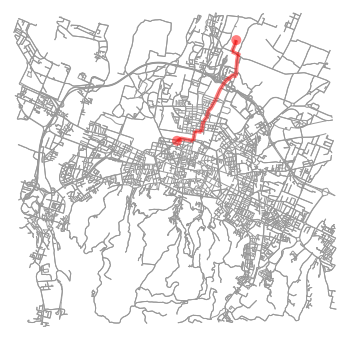

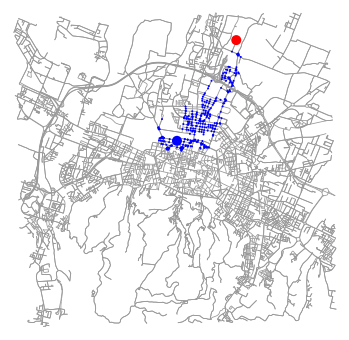

In [9]:
#start = timer()
Astar(graph, 400885366, 2101631643, euclidian)
#end = timer()
#print((end - start)*1000)